In [1]:
# if you know how model is running, then you can find best hyperparameter for job, best model, correct training algorithm
# this part we learn about ordinaly linear model

# linear regression
# for practice linear regression, first we make data which like linear

import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3*X + np.random.randn(100,1)

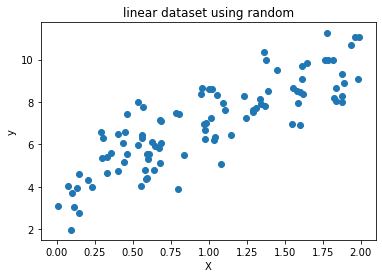

In [2]:
# show graph
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(X,y)
plt.title('linear dataset using random')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

In [3]:
# now we calculate theta using normal equation
# normal equation is mathematical equation for get result directly
# theta = (X.T * X)^-1 *X.T*y
# this theta is minimized cost function

X_b = np.c_[np.ones((100, 1)),X] # this make bias
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [4]:
# our equation is y = 4x + 3 + norm_error
# below result is calulated by norm equation
# we can show theta is similar (4:3.944),(3,2.913)
# why it is not same (because we use gause norm error)
theta_best

array([[4.0296719 ],
       [2.99513901]])

In [5]:
# we use theta_best to predict

X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)), X_new] # bias
y_pred = X_new_b.dot(theta_best)
y_pred

array([[ 4.0296719 ],
       [10.01994993]])

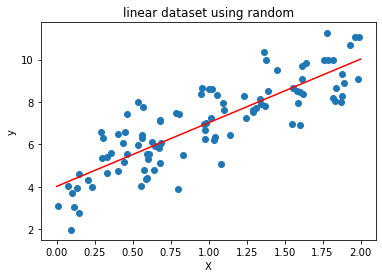

In [6]:
# show graph
%matplotlib inline

plt.scatter(X, y)
plt.plot(X_new, y_pred,'r-',label='predict')
plt.title('linear dataset using random')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

In [7]:
# in sklearn, we can use linear regression easily
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [8]:
# intercept_ is bias and coef_ is weight

lin_reg.intercept_, lin_reg.coef_

(array([4.0296719]), array([[2.99513901]]))

In [9]:
lin_reg.predict(X_new)

array([[ 4.0296719 ],
       [10.01994993]])

In [10]:
# Linear regression class is based on scipy.linalg.lstsq() (least squares)

theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b,y, rcond=1e-6)
theta_best_svd, residuals, rank, s 

(array([[4.0296719 ],
        [2.99513901]]),
 array([116.510639]),
 2,
 array([14.60336969,  3.89360841]))

In [11]:
# this function calculate theta_hat = X^+ y
# X^+ is X's pseudoinverse(Moore-Penrose inverse matrix)
# we can get pseudoinverse by use np.linalg.pinv()
# pseudoinverse is calculated by SVD(singular value decomposition)

np.linalg.pinv(X_b).dot(y)

array([[4.0296719 ],
       [2.99513901]])

In [12]:
# batch gradient descent
learning_rate = 0.1
n_iterations = 1000
m = 100

theta = np.random.randn(2,1)

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta -= (learning_rate * gradients)

In [13]:
theta

array([[4.0296719 ],
       [2.99513901]])

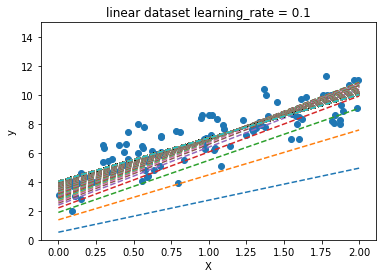

In [14]:
%matplotlib inline
# to compare learning rate by graph
def draw_graph(theta):
    y_pred = X_new_b.dot(theta)
    plt.plot(X_new, y_pred,'--')

theta = np.random.randn(2,1)

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta -= (0.1 * gradients)
    draw_graph(theta)

plt.scatter(X, y)
plt.title('linear dataset learning_rate = 0.1')
plt.xlabel('X')
plt.ylabel('y')
plt.ylim((0,15))
plt.show()

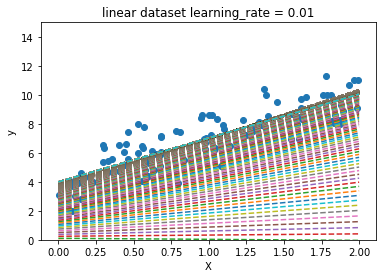

In [15]:
%matplotlib inline
# to compare learning rate by graph
def draw_graph(theta):
    y_pred = X_new_b.dot(theta)
    plt.plot(X_new, y_pred,'--')

theta = np.random.randn(2,1)

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta -= (0.01 * gradients)
    draw_graph(theta)

plt.scatter(X, y)
plt.title('linear dataset learning_rate = 0.01')
plt.xlabel('X')
plt.ylabel('y')
plt.ylim((0,15))
plt.show()

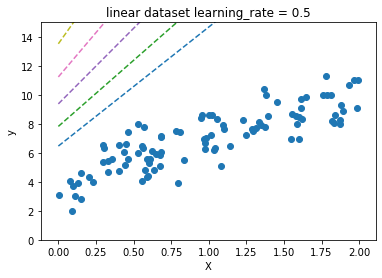

In [16]:
%matplotlib inline
# to compare learning rate by graph
def draw_graph(theta):
    y_pred = X_new_b.dot(theta)
    plt.plot(X_new, y_pred,'--')

theta = np.random.randn(2,1)

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta -= (0.5 * gradients)
    draw_graph(theta)

plt.scatter(X, y)
plt.title('linear dataset learning_rate = 0.5')
plt.xlabel('X')
plt.ylabel('y')
plt.ylim((0,15))
plt.show()

In [17]:
theta

array([[-3.76311008e+54],
       [-4.34792750e+54]])

In [18]:
# sgd(Stochastic Gradient Descent)

n_epochs = 50
t0, t1 = 5, 50 # learning schedule hyperparameter

def learning_schedule(t):
    return t0 / (t+t1)
theta = np.random.randn(2,1)

m = len(X_b)
for epoch in range(n_epochs):
    for i in range(m):
        random_idx = np.random.randint(m)
        xi = X_b[random_idx:random_idx+1]
        yi = y[random_idx:random_idx+1]
        gradients = 2* xi.T.dot(xi.dot(theta)-yi)
        eta = learning_schedule(epoch * m + i)
        theta -= (eta * gradients)


In [19]:
theta

array([[3.99554839],
       [2.98669785]])

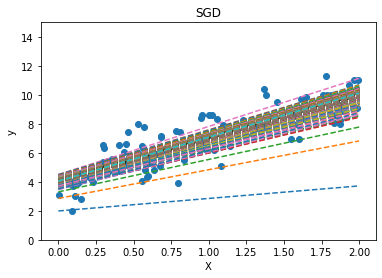

In [20]:
%matplotlib inline
# to compare learning rate by graph
def draw_graph(theta):
    y_pred = X_new_b.dot(theta)
    plt.plot(X_new, y_pred,'--')

theta = np.random.randn(2,1)

for epoch in range(n_epochs):
    for i in range(m):
        random_idx = np.random.randint(m)
        xi = X_b[random_idx:random_idx+1]
        yi = y[random_idx:random_idx+1]
        gradients = 2* xi.T.dot(xi.dot(theta)-yi)
        eta = learning_schedule(epoch * m + i)
        theta -= (eta * gradients)
        draw_graph(theta)

plt.scatter(X, y)
plt.title('SGD')
plt.xlabel('X')
plt.ylabel('y')
plt.ylim((0,15))
plt.show()

In [21]:
# sgd in sklearn

from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X,y.ravel())

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.1, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty=None, power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [22]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.00178363]), array([2.99004006]))

In [23]:
# pollynomial regression

# first of all we have to make non-linear data bu quandratic equation

m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m,1)

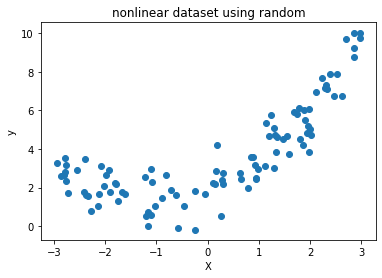

In [24]:
# show graph
%matplotlib inline


plt.scatter(X,y)
plt.title('nonlinear dataset using random')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

In [25]:
# we use sklearn polynomial feature to convert training data

from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)


In [26]:
X[0], X_poly[0]

(array([-1.02885795]), array([-1.02885795,  1.05854869]))

In [27]:
# apply in linear regression
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [28]:
lin_reg.intercept_, lin_reg.coef_

(array([1.87856563]), array([[1.04320681, 0.50519112]]))

In [29]:
lin_reg_linear = LinearRegression()
lin_reg_linear.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

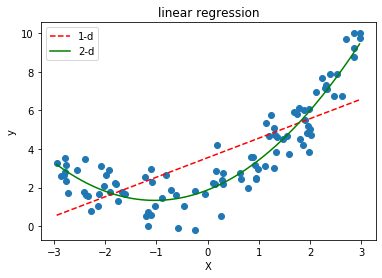

In [30]:
# show graph
# when many feature, we can find relation between feature by using polynomial regression 
# but if we use high dimension regression it occur overfitting
%matplotlib inline

X_new = np.arange(X.min(),X.max(),0.01)
y_pred_linear = lin_reg_linear.predict(X_new.reshape(len(X_new),1))
X_new_poly = poly_features.fit_transform(X_new.reshape(len(X_new),1))
y_pred_poly = lin_reg.predict(X_new_poly)

plt.scatter(X, y)
plt.plot(X_new, y_pred_linear,'r--',label='1-d')
plt.plot(X_new, y_pred_poly,'g-',label='2-d')
plt.title('linear regression')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

In [31]:
# how can we know model occur overfitting or underfitting
# first using k-fold cross validation
# another is draw learning curve
# to draw learning curve, we only train model many times by subset which have another size
# below is learning curve draw 

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.2)
    train_errors, val_errors =[], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_pred = model.predict(X_train[:m])
        y_val_pred = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_pred))
        val_errors.append(mean_squared_error(y_val,y_val_pred))
    plt.plot(np.sqrt(train_errors), 'r-+', linewidth=2, label='train_set')
    plt.plot(np.sqrt(val_errors), 'b-', linewidth=3, label='test_set')
    plt.legend()
    plt.ylim((0,3))
    plt.show()


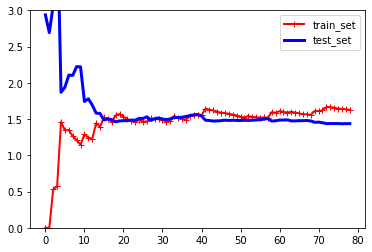

In [32]:
%matplotlib inline
lin_reg = LinearRegression()
plot_learning_curves(lin_reg,X,y)

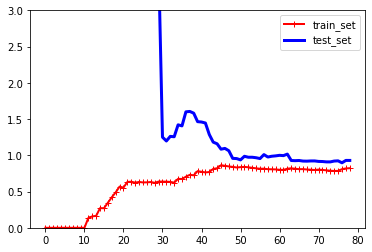

In [33]:
# 10 dimension
from sklearn.pipeline import Pipeline

polynomial_reg = Pipeline([
    ('poly_features', PolynomialFeatures(degree=10, include_bias=False)),
    ('lin_reg', LinearRegression()),
])
plot_learning_curves(polynomial_reg, X, y)

In [34]:
# to reduce overfitting, best is regulation about model
# linear regression model usually regulated by limited weights.

# ridge regression(tikhonov regulation)
# if alpha is 0 then it is same with linear regression
# fist we make dataset
np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

In [35]:
# below is ridge regression by normal equation

from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky", random_state=42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.55071465]])

In [36]:
# below is ridge regression by using sgd

sgd_reg = SGDRegressor(penalty="l2", random_state=42)
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([1.47012588])

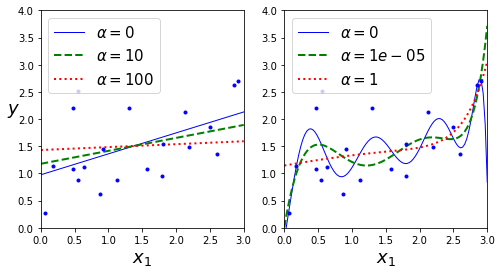

In [37]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler

def plot_model(model_class, polynomial, alphas, **model_kargs):
    for alpha, style in zip(alphas, ("b-", "g--", "r:")):
        model = model_class(alpha, **model_kargs) if alpha > 0 else LinearRegression()
        if polynomial:
            model = Pipeline([
                    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
                    ("std_scaler", StandardScaler()),
                    ("regul_reg", model),
                ])
        model.fit(X, y)
        y_new_regul = model.predict(X_new)
        lw = 2 if alpha > 0 else 1
        plt.plot(X_new, y_new_regul, style, linewidth=lw, label=r"$\alpha = {}$".format(alpha))
    plt.plot(X, y, "b.", linewidth=3)
    plt.legend(loc="upper left", fontsize=15)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 3, 0, 4])

plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0, 10**-5, 1), random_state=42)

plt.show()

/Users/hh/opt/anaconda3/envs/homl2/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.802867703827423, tolerance: 0.0009294783355207351
  positive)


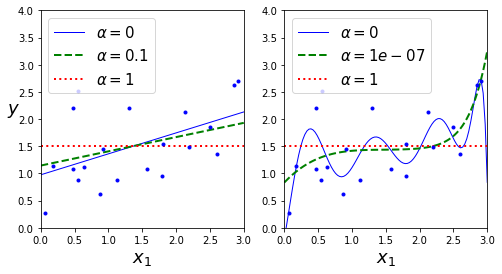

In [38]:
# Lasso regression(least absolute shirnkage and selection operator)
# it is same with ridge in adding regulation
# but in lasso weights l1 norm instead of l2 norm power
from sklearn.linear_model import Lasso

plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Lasso, polynomial=False, alphas=(0, 0.1, 1), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Lasso, polynomial=True, alphas=(0, 10**-7, 1), random_state=42)
plt.show()

In [39]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([1.53788174])

In [40]:
# below is ridge regression by using sgd

sgd_reg = SGDRegressor(penalty="l1", random_state=42)
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([1.47011206])

In [41]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([1.54333232])

In [ ]:
###########